# Homework 2: Doing Excel work with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats

In [2]:
from whatif import Model
from whatif import  get_sim_results_df

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline

# Analysis 1 - Basic Break Even Analysis

## A. Base Model

In [117]:
class SingleProductSPF(Model):
    """Base Model

    This example of a single product demand model was provided in the assignment.
    
    * we have to place an order for a perishable product,
    * there's a known variable cost for each one ordered,
    * there is a set fixed cost that does not change with demand,
    * demand is uncertain but we can model it with a quadratic function,
    * we assume that the company can statify all demand,
    * we need to select the optimal selling price given the inputs.

    Attributes
    ----------
    fixed_cost: float or array-like of float, optional
        Cost is the same no matter how many items sell (default 5000)
    var_cost: float or array-like of float, optional
        Cost for each item sold (default 100)
    selling_price : float or array-like of float, optional
        Selling price for each item (default 115)
    There is a quadratic function in the format Ax**2 + Bx + C
        spf_constant : float or array-like of float, optional
            This is the constant, or C value, in the quadric equation above (default 4900)
        spf_linear : float or array-like of float, optional
            This is the coefficient of the linear value, or B value, in the quadric equation above (default -35)
        spf_constant : float or array-like of float, optional
            This is the coefficient of the quadratic value, or A value, in the quadric equation above (default 0.06)
    """
    def __init__(self, fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    
    def demand(self):
        """Compute total demand based on selling price"""
        demand = (self.spf_quadratic * (self.selling_price ** 2)) + (self.spf_linear * self.selling_price) + self.spf_constant
        return demand
    
    def total_var_cost(self):
        """Compute total variable costs assuming the company covers the entire demand"""
        return self.demand() * self.var_cost
    
    def total_cost(self):
        """Compute the sum of total variable and fixed costs"""
        return self.total_var_cost() + self.fixed_cost
    
    def sales_revenue(self):
        """Compute sales revenue assuming the company meets the entire demand"""
        return self.demand() * self.selling_price
    
    def profit(self):
        """Compute profict as the difference between revenue and costs"""
        return self.sales_revenue() - self.total_cost()

In [118]:
model1 = SingleProductSPF()
print(f'The demand at a selling price of ${model1.selling_price} is {model1.demand():,.2f}, producing a profit of ${model1.profit():,.2f}')

The demand at a selling price of $115 is 1,668.50, producing a profit of $20,027.50


Based on the testing values, I confirmed that the model is working correctly. I learned the important lesson that calculated objects require parenthesis after them, but input values do not.

## B. 1-Way Data Table

In [119]:
#Create dictionary with array of inputs
dt_param_ranges1 = {'selling_price': np.arange(80, 141, 10)}

#Create list of outputs
outputs1 = ['demand', 'profit']

#Run the data table method and save the pandas dataframe
m1_dt1_df = model1.data_table(dt_param_ranges1, outputs1)
m1_dt1_df

,selling_price,demand,profit
0,80,2484.0,-54680.0
1,90,2236.0,-27360.0
2,100,2000.0,-5000.0
3,110,1776.0,12760.0
4,120,1564.0,26280.0
5,130,1364.0,35920.0
6,140,1176.0,42040.0


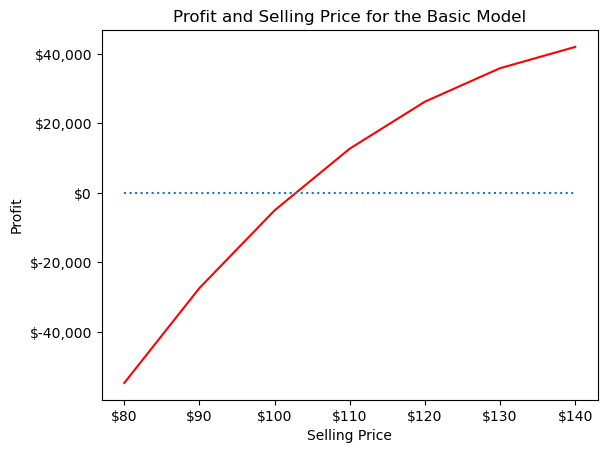

In [120]:
# Initialize plot
plt.style.use('default')
fig, ax = plt.subplots()

# Create series variables
selling_price = np.array(m1_dt1_df['selling_price'])
profit = np.array(m1_dt1_df['profit'])

# Plot series
ax.plot(selling_price, profit, 'r-', label='Profit')

# Style plot elements
ax.set(title='Profit and Selling Price for the Basic Model', xlabel='Selling Price', ylabel='Profit')
plt.hlines(0, 80, 140, linestyles='dotted')

#Format axixes
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick) 

# Show the plot
plt.show()

Based on the data table, the trends appear to be moving in the correct direction. Demand decreases and profit increases and selling price increases. It appears that the break-even point for profit is between 100 and 105 dollars.

Profit and selling price have a non-linear relationship. This makes sense becuase demand is non-linear. This cascased to make revenue non-linear as well. Profit is a combination of the the quadratic revenue function and the linear cost function.

## C. Break Even

In [121]:
# Find the the selling price where profit = 0 between $80 and $140
be_selling_price1 = model1.goal_seek('profit', 0, 'selling_price', 80, 140)

# Print the restuls
print(f'The basic model for profit breaks even at zero at a selling price of ${be_selling_price1:.2f}.')

The basic model for profit breaks even at zero at a selling price of $102.58.


This method finds the break-even selling price between 80 and 140 dollars. Because the demand function is quadratic, I expect there is another break-even point outside this range. The graph above suggests the second break even-point is at a higher selling price.

## D. 2-Way Data Table

In [126]:
#Create dictionary with array of inputs
dt_param_ranges2 = {'selling_price': np.arange(80, 141, 10),
                   'var_cost': np.arange(85, 111, 5)}

#Create list of outputs
outputs2 = ['profit', 'total_cost']

#Run the data table method and save the pandas dataframe
m1_dt2_df = model1.data_table(dt_param_ranges2, outputs2)

In [127]:
#View top of data frame
m1_dt2_df.head()

,selling_price,var_cost,profit,total_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0


In [128]:
#View bottom of data frame
m1_dt2_df.tail()

,selling_price,var_cost,profit,total_cost
37,140,90,53800.0,110840.0
38,140,95,47920.0,116720.0
39,140,100,42040.0,122600.0
40,140,105,36160.0,128480.0
41,140,110,30280.0,134360.0


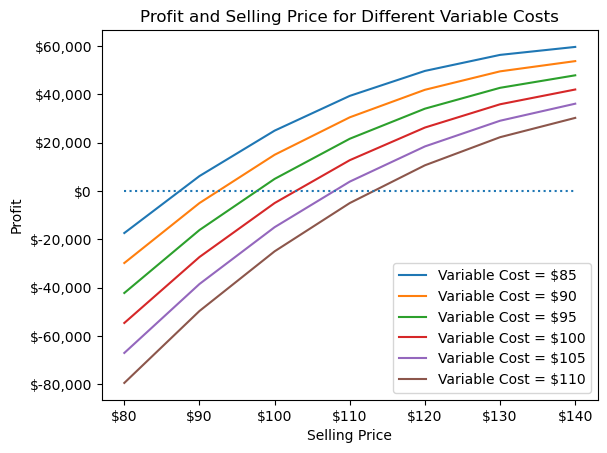

In [170]:
# Initialize plot
plt.style.use('default')
fig, ax = plt.subplots()

# Create series variables
selling_price = []
profit = []
line_label = []

for i in range(85, 111, 5):
    selling_price.append(m1_dt2_df[m1_dt2_df.var_cost == i]['selling_price'])
    profit.append(m1_dt2_df[m1_dt2_df.var_cost == i]['profit'])
    line_label.append(f'Variable Cost = ${i}')
    
selling_price = np.array(selling_price)
profit = np.array(profit)
line_label = np.array(line_label)

# Plot series
for j in range(0, 6):
    ax.plot(selling_price[j], profit[j], label=line_label[j])

# Style plot elements
ax.set(title='Profit and Selling Price for Different Variable Costs', xlabel='Selling Price', ylabel='Profit')
plt.hlines(0, 80, 140, linestyles='dotted')
ax.legend(loc='lower right')

#Format axixes
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick) 

# Show the plot
plt.show()

The graph shows that high variables costs have lower profit at the same selling point. This means that the break-even selling price for a variable cost of 110 is the highest of all the options. This makes sense because the business needs high prices to cover the higher costs. The graph appears to show the lines converging closer to a selling price of 140. This may be due to the effect of fixed costs, but I need further investigation to fully understand it.

## E. Digging Deeper

### Goal Seek

In [177]:
# Find the the selling price where profit = 0 between $80 and $250
be_selling_price2 = model1.goal_seek('profit', 0, 'selling_price', 80, 250)

print(be_selling_price2)

None


The model is unable to find a bread-even point in this range. I think this occurs due to the quadratic nature of the profit model. The goal_seek method bisects the data and finds break-even points in both halves. This confuses the model. It does not know which half to continue bisecting, so it quits and returns a value of `None`.

In [179]:
be_selling_price3 = model1.goal_seek('profit', 0, 'selling_price', 140, 250)

# Print the restuls
print(f'The basic model for profit returns another breaks even selling price at ${be_selling_price3:.2f}.')

The basic model for profit returns another breaks even selling price at $228.00.


### 1-Way Data Table

In [181]:
#Create dictionary with array of inputs
dt_param_ranges1 = {'selling_price': np.arange(80, 251, 10)}

#Create list of outputs
outputs1 = ['demand', 'profit']

#Run the data table method and save the pandas dataframe
m1_dt1_df = model1.data_table(dt_param_ranges1, outputs1)
m1_dt1_df

,selling_price,demand,profit
0,80,2484.0,-54680.0
1,90,2236.0,-27360.0
2,100,2000.0,-5000.0
3,110,1776.0,12760.0
4,120,1564.0,26280.0
5,130,1364.0,35920.0
6,140,1176.0,42040.0
7,150,1000.0,45000.0
8,160,836.0,45160.0
9,170,684.0,42880.0


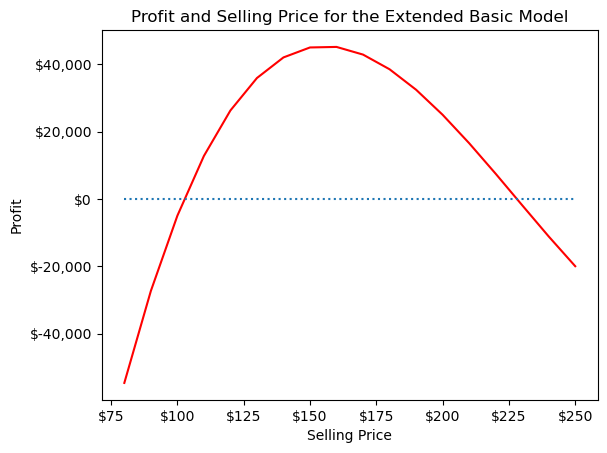

In [183]:
# Initialize plot
plt.style.use('default')
fig, ax = plt.subplots()

# Create series variables
selling_price = np.array(m1_dt1_df['selling_price'])
profit = np.array(m1_dt1_df['profit'])

# Plot series
ax.plot(selling_price, profit, 'r-', label='Profit')

# Style plot elements
ax.set(title='Profit and Selling Price for the Extended Basic Model', xlabel='Selling Price', ylabel='Profit')
plt.hlines(0, 80, 250, linestyles='dotted')

#Format axixes
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick) 

# Show the plot
plt.show()

This graph supports my hypothesis above and shows why the goal seek failed. There are two break-even points. The code for `goal_seek()` does not clearly tell it which one to target. Therefore, the method was confused and returned a value of `None`.

## F. Simulation

In [212]:
# Set seed and create random distribution of variable cost
num_reps = 10000
np.random.seed(8826)
random_inputs = {'var_cost': np.random.uniform(80, 120, num_reps)}

#Specify profit as output
sim_outputs = ['profit']

#Run the simulation
model1_simresults = model1.simulate(random_inputs, sim_outputs)

#Run the outputs into at dataframe and view results
model1_simresults_df = get_sim_results_df(model1_simresults)
model1_simresults_df

,profit,scenario_num
0,17705.704810,0
1,44326.101396,0
2,51011.679838,0
3,-8481.978501,0
4,27485.849683,0
...,...,...
9995,27848.226382,0
9996,42527.325290,0
9997,12728.292651,0
9998,22294.143950,0


### Histogram of Profit

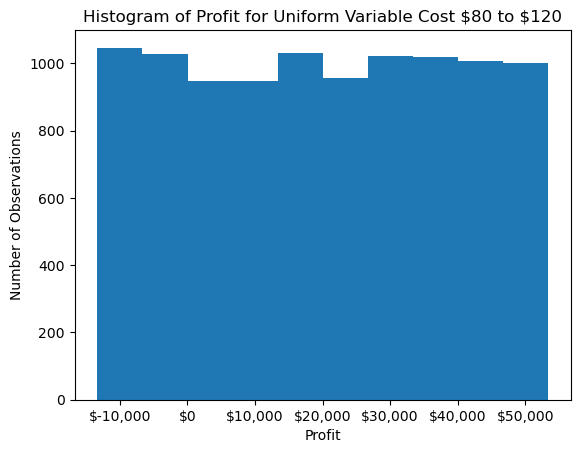

In [214]:
# Initialize plot
plt.style.use('default')
fig, ax = plt.subplots()

# Create series variables
profit = np.array(model1_simresults_df['profit'])

# Plot series
ax.hist(profit)

# Style plot elements
ax.set(title='Histogram of Profit for Uniform Variable Cost \$80 to \$120', xlabel='Profit', ylabel='Number of Observations')

#Format x-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show the plot
plt.show()

The graph shows that a uniform distribution of variable costs produces an approximately uniform distribution of profit. The histogram looks more uniform as the number of random values increase.

### Probability

In [220]:
prob_neg = stats.percentileofscore(model1_simresults_df['profit'], 0)/100

print(f'There is a {prob_neg:.2%} probability that profit is negative.')

There is a 20.73% probability that profit is negative.


The probability of a negative profit approximately matches the histogram, so I have confidence in that number. Assuming all the other base inputs are true, this business seems like a good risk to consider. There is almost an 80% chance that this business with make a profit. However, the final decision will depend on the individual’s risk tolerance.